# SEC Failure To Deliver Data (Filtered for GME, AMC, and BB) Jan. - May. 2021

### Import Packages

In [1]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load Text Data From SEC Website

In [2]:
r = urllib2.urlopen("https://www.sec.gov/files/data/fails-deliver-data/cnsfails202101a.zip").read()
file = ZipFile(BytesIO(r))
jan_a_csv = file.open("cnsfails202101a.txt",)
jan_a = pd.read_csv(jan_a_csv, sep = "\|")


r = urllib2.urlopen("https://www.sec.gov/files/data/fails-deliver-data/cnsfails202101b.zip").read()
file = ZipFile(BytesIO(r))
jan_b_csv = file.open("cnsfails202101b.txt",)
jan_b = pd.read_csv(jan_b_csv, sep = "\|")

r = urllib2.urlopen("https://www.sec.gov/files/data/fails-deliver-data/cnsfails202102a.zip").read()
file = ZipFile(BytesIO(r))
feb_a_csv = file.open("cnsfails202102a.txt",)
feb_a = pd.read_csv(feb_a_csv, sep = "\|")

r = urllib2.urlopen("https://www.sec.gov/files/data/fails-deliver-data/cnsfails202102b.zip").read()
file = ZipFile(BytesIO(r))
feb_b_csv = file.open("cnsfails202102b.txt",)
feb_b = pd.read_csv(feb_b_csv, sep = "\|")

r = urllib2.urlopen("https://www.sec.gov/files/data/fails-deliver-data/cnsfails202103a.zip").read()
file = ZipFile(BytesIO(r))
mar_a_csv = file.open("cnsfails202103a.txt",)
mar_a = pd.read_csv(mar_a_csv, sep = "\|")

r = urllib2.urlopen("https://www.sec.gov/files/data/fails-deliver-data/cnsfails202103b.zip").read()
file = ZipFile(BytesIO(r))
mar_b_csv = file.open("cnsfails202103b.txt",)
mar_b = pd.read_csv(mar_b_csv, sep = "\|")

r = urllib2.urlopen("https://www.sec.gov/files/data/fails-deliver-data/cnsfails202104a.zip").read()
file = ZipFile(BytesIO(r))
apr_a_csv = file.open("cnsfails202104a.txt",)
apr_a = pd.read_csv(apr_a_csv, sep = "\|")

r = urllib2.urlopen("https://www.sec.gov/files/data/fails-deliver-data/cnsfails202104b.zip").read()
file = ZipFile(BytesIO(r))
apr_b_csv = file.open("cnsfails202104b.txt",)
apr_b = pd.read_csv(apr_b_csv, sep = "\|", error_bad_lines=False, warn_bad_lines=False)

r = urllib2.urlopen("https://www.sec.gov/files/data/fails-deliver-data/cnsfails202105a.zip").read()
file = ZipFile(BytesIO(r))
may_a_csv = file.open("cnsfails202105a.txt",)
may_a = pd.read_csv(may_a_csv, sep = "\|", error_bad_lines=False, warn_bad_lines=False)


In [3]:
frames = [jan_a, jan_b, feb_a, feb_b, mar_a, mar_b, apr_a, apr_b, may_a]

result = pd.concat(frames)

result.head()

,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
0,20210104,B38564108,EURN,19305.0,EURONAV NV ANTWERPEN (BELGIUM),8.00
1,20210104,D18190898,DB,11259.0,DEUTSCHE BANK AG NAMEN AKT (DE,10.90
2,20210104,G00748106,STWO,17643.0,ACON S2 ACQUISITION CORP.CL A,10.08
3,20210104,G00748122,STWOU,3141.0,ACON S2 ACQUIST CORP UNIT 1 CL,10.50
4,20210104,G0083D104,ACEVW,42372.0,ACE CONVERGENCE ACQUISITION CO,1.39


### Once data is loaded, it is stored as two part month variables. These are combined into a single data frame, then filtered for the appropriate ticker.

In [38]:
stonk = result["SYMBOL"] == 'GME'
gme = result[stonk]

stonk = result["SYMBOL"] == 'AMC'
amc = result[stonk]

stonk = result["SYMBOL"] == 'BB'
bb = result[stonk]

stonk = result["SYMBOL"] == 'WISH'
wish = result[stonk]

stonk = result["SYMBOL"] == 'ASO'
aso = result[stonk]

stonk = result["SYMBOL"] == 'WEN'
wen = result[stonk]

stonk = result["SYMBOL"] == 'NOK'
nok = result[stonk]

### The failure to deliver data for GME looks like this. There are actually 91 rows of data, this is just a glimpse.

In [30]:
gme.head()

,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
2120,20210104,36467W109,GME,182269.0,GAMESTOP CORP (HLDG CO) CL A,18.84
7188,20210105,36467W109,GME,490723.0,GAMESTOP CORP (HLDG CO) CL A,17.25
12319,20210106,36467W109,GME,772112.0,GAMESTOP CORP (HLDG CO) CL A,17.37
17576,20210107,36467W109,GME,799328.0,GAMESTOP CORP (HLDG CO) CL A,18.36
22785,20210108,36467W109,GME,555658.0,GAMESTOP CORP (HLDG CO) CL A,18.08


### This is AMC's data.

In [31]:
amc.head()

,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
361,20210104,00165C104,AMC,111844.0,AMC ENTMT HLDGS INC CL A COM S,2.12
5498,20210105,00165C104,AMC,1631091.0,AMC ENTMT HLDGS INC CL A COM S,2.01
15792,20210107,00165C104,AMC,4241943.0,AMC ENTMT HLDGS INC CL A COM S,2.01
20986,20210108,00165C104,AMC,11547981.0,AMC ENTMT HLDGS INC CL A COM S,2.05
31810,20210112,00165C104,AMC,5900.0,AMC ENTMT HLDGS INC CL A COM S,2.20


### This is the data for BB.

In [32]:
bb.head()

,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
862,20210104,09228F103,BB,506392.0,BLACKBERRY LTD COM STK (CDA),6.63
5988,20210105,09228F103,BB,84745.0,BLACKBERRY LTD COM STK (CDA),6.58
11069,20210106,09228F103,BB,335512.0,BLACKBERRY LTD COM STK (CDA),6.77
16331,20210107,09228F103,BB,422050.0,BLACKBERRY LTD COM STK (CDA),6.71
21548,20210108,09228F103,BB,16140.0,BLACKBERRY LTD COM STK (CDA),7.06


### This Section adds up all the FTD's for each respective stock and lists them by symbol.

In [39]:
gme_fails=gme['QUANTITY (FAILS)']
amc_fails=amc['QUANTITY (FAILS)']
bb_fails=bb['QUANTITY (FAILS)']
wish_fails=wish['QUANTITY (FAILS)']
aso_fails=aso['QUANTITY (FAILS)']
wen_fails=wen['QUANTITY (FAILS)']
nok_fails=nok['QUANTITY (FAILS)']


gfail=gme_fails.sum()
afail=amc_fails.sum()
bfail=bb_fails.sum()
wfail=wish_fails.sum()
asfail=aso_fails.sum()
wenfail=wen_fails.sum()
nokfail=nok_fails.sum()


data = {'SYMBOL': ['GME','AMC', 'BB', 'WISH', 'ASO', 'WEN', 'NOK'],
        'Number of FTDs': [100*gfail/70770000, 100*afail/501780000,
                           100*bfail/566220000, 100*wfail/619000000,
                          100*asfail/90570000, 100*wenfail/221360000, 100*nokfail/5630000000]}
  
df = pd.DataFrame(data)
df

,SYMBOL,Number of FTDs
0,GME,26.111101
1,AMC,26.618273
2,BB,2.785116
3,WISH,8.687614
4,ASO,0.854234
5,WEN,0.099050
6,NOK,1.301711


### Below is a bar graph of failure to deliver data for a few meme stocks. This data is expressed as a percentage of the respective float of the stock.

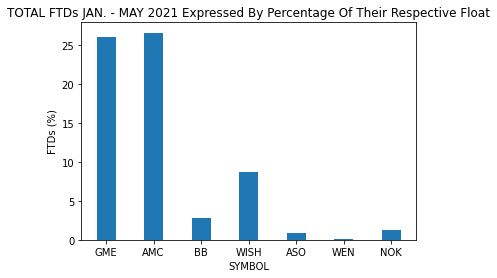

In [41]:
bar_width = 0.4

plt.bar(df['SYMBOL'], df['Number of FTDs'], bar_width)

plt.ylabel("FTDs (%)")
plt.xlabel("SYMBOL")
plt.title('TOTAL FTDs JAN. - MAY 2021 Expressed By Percentage Of Their Respective Float')

plt.show()